In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
#About dataset
df = pd.read_csv(r"C:\Users\Dell\Desktop\TCS_Hackathon\german_credit_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
# fill missing value
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

In [6]:
# Create Target Variable (Risk)
credit_threshold = df['Credit amount'].median()
duration_threshold = df['Duration'].median()

df['Risk'] = (
    (df['Credit amount'] > credit_threshold) &
    (df['Duration'] < duration_threshold)
).astype(int)

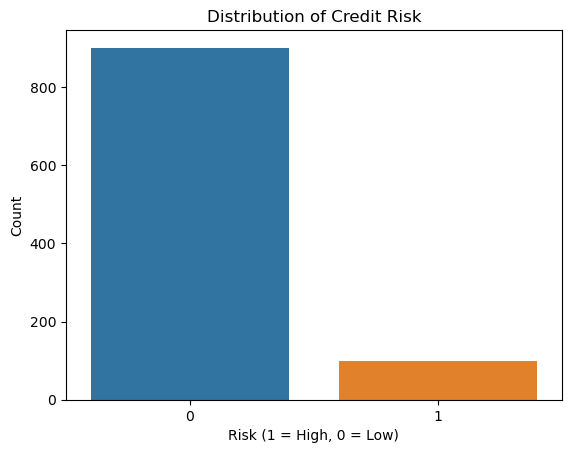

In [7]:
#Visualize Risk Distribution
sns.countplot(data=df, x='Risk')
plt.title('Distribution of Credit Risk')
plt.xlabel('Risk (1 = High, 0 = Low)')
plt.ylabel('Count')
plt.show()

In [9]:
# Encode Categorical Columns
le = LabelEncoder()
for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    df[col] = le.fit_transform(df[col])

In [10]:
# Prepare Features and Target
X = df.drop(columns=['Unnamed: 0', 'Risk'])  # Drop unnecessary columns
y = df['Risk']

In [11]:
#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

In [12]:
# Train Random Forest Mode
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [13]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

[[270   0]
 [  0  30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

ROC AUC Score: 1.0


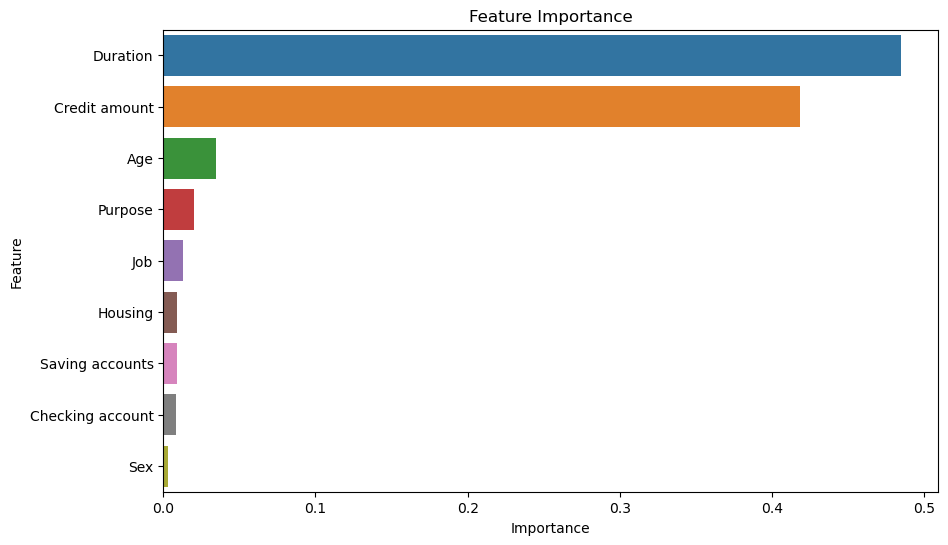

In [14]:
# Feature Importance Visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

In [16]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9846153846153847
